In [61]:
import numpy as np
import pandas as pd

train = pd.read_csv('/Users/admin/Desktop/House_Price_Dataset.csv')
train= train.drop(['Suburb','Address','Type','Method','Seller','Date','CouncilArea','RegionName','Latitude','Longitude'],axis=1,inplace=False)
train = train.dropna(axis = 0, inplace=False)
train.describe()



,Rooms,Price,Distance,Postcode,Rooms2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PropertyCount
count,8895.00000,8.895000e+03,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000
mean,3.09882,1.092524e+06,11.202136,3111.698033,3.078134,1.646655,1.692636,523.395166,149.295708,1965.777403,7473.779314
std,0.96359,6.792066e+05,6.815113,112.781766,0.966070,0.721388,0.975393,1060.940841,87.898565,37.055054,4374.181898
min,1.00000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,249.000000
25%,2.00000,6.405000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,4380.000000
50%,3.00000,9.000000e+05,10.200000,3083.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,6567.000000
75%,4.00000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,10331.000000
max,12.00000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,21650.000000


In [69]:
y=train['Price']  
train1=train.drop(['Price'], axis=1)  

In [77]:
X=pd.get_dummies(train1).reset_index() 
X.shape

(8895, 11)

In [196]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split  

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)


In [194]:
np.any(np.isnan(train))

False

In [193]:
np.all(np.isfinite(train))

True

In [201]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

pred=lm.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
rmse


470707.50779336115

In [197]:
logrmse=np.sqrt(mean_squared_error(np.log(y_test),np.log(np.abs(pred))))
logrmse

0.41626515539693826

# PCA

In [238]:
from sklearn.decomposition import PCA
X = train[:train.shape[0]]
pca = PCA(n_components=11)
# X is the matrix transposed (n samples on the rows, m features on the columns)
pca.fit(X)

X_new = pca.transform(X)
print (X_new)

[[-5.75229131e+04 -3.47396220e+03 -3.88964368e+02 ... -6.29849193e-01
   1.37312416e-01  2.96932416e-02]
 [ 3.72477055e+05 -3.30906507e+03 -4.48787615e+02 ... -1.26670840e+00
   5.30342111e-01  2.64076045e-02]
 [ 5.07477041e+05 -3.25722598e+03 -4.74572379e+02 ...  9.74306526e-02
  -1.23668337e+00 -6.84578638e-01]
 ...
 [-2.04523873e+05 -1.00599442e+03 -4.15036517e+02 ... -1.40302251e-01
   5.84242689e-01  1.12794556e-02]
 [-3.87523846e+05 -1.07704394e+03 -2.76778496e+02 ...  9.24767014e-01
  -2.50800866e-01  1.88371469e-02]
 [-7.25238681e+04 -9.56551746e+02 -2.74930757e+02 ... -6.96669230e-01
   5.35752291e-02  3.33405518e-02]]


In [239]:
from sklearn.feature_selection import VarianceThreshold
X = train[:train.shape[0]]
print (X.shape[1])
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
print (X.shape[1])

11
11


In [198]:
def benchmark(model,testset,label):
    pred=model.predict(testset)
    lrmse=np.sqrt(mean_squared_error(np.log(y_test),np.log(np.abs(pred))))
    return lrmse


# Features Engineering

In [289]:
def TestDataSet(train):
    y=train['Price']
    X=pd.get_dummies(train.drop(['Price'],axis=1))
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
    lm=LinearRegression()
    lm.fit(X_train,y_train)
    return benchmark(lm,X_test,y_test)

SP_Corr=train.corr()['Price']

print(TestDataSet(train))
print(TestDataSet(train.drop(SP_Corr[(SP_Corr<0.3)&(SP_Corr>0)].index.tolist(),axis=1)))
print(TestDataSet(train.drop(SP_Corr[(SP_Corr<0.1)&(SP_Corr>0)].index.tolist(),axis=1)))
print(TestDataSet(train.drop(SP_Corr[(SP_Corr<0.1)&(SP_Corr>-0.1).drop(['Price'])].index.tolist(),axis=1)))

0.41531085974039533
0.3759468769965598
0.38272824412817275
0.38276444040451757


# Linear Regression

In [202]:
benchmark(lm,X_test,y_test)


0.41626515539693826

In [209]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

lmmodel=make_pipeline(RobustScaler(),lm).fit(X_train,y_train)
benchmark(lmmodel,X_test,y_test)

0.4162651553971061

# Ridge Regression

In [175]:
from sklearn.model_selection import KFold # cross validation
from sklearn.linear_model import RidgeCV

In [176]:
kfolds=KFold(n_splits=10,shuffle=True,random_state=123) # split it into 10 pieces

In [182]:
def ridge_train_test(alpha):                      
    ridge_model=make_pipeline(RobustScaler(),RidgeCV(alphas=[alpha],cv=kfolds)).fit(X_train,y_train)
    lrmse=benchmark(ridge_model,X_test,y_test)
    return lrmse
r_alphas1=np.logspace(-10,2,100)  # from -10th power of 10 to 2nd power of 10, 100 numbers between them
r_alphas2=np.logspace(-10,5,100)  # from -10th power of 10 to 5th power of 10, 100 numbers between them

scores1=[]
scores2=[]
for k in r_alphas1:
    scores1.append(ridge_train_test(k))
    
for k in r_alphas2:
    scores2.append(ridge_train_test(k))

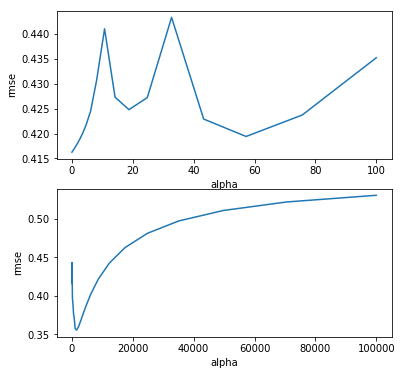

In [241]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211)
plt.plot(r_alphas1,scores1)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.subplot(212)
plt.plot(r_alphas2,scores2)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()


In [205]:
scores1[0]  

0.41626515539719317

In [206]:
ridge_model2=make_pipeline(RobustScaler(),RidgeCV(alphas=r_alphas1,cv=kfolds)).fit(X_train,y_train)
benchmark(ridge_model2,X_test,y_test)

ridge_model2.steps[1][1].alpha_  # find the best alpha

75.64633275546291

# lasso regression

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


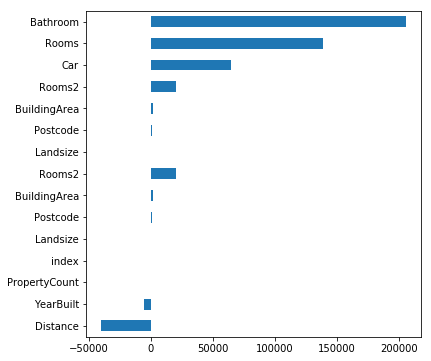

In [234]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(8),
                     coef.sort_values().tail(7)])
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 6)
imp_coef.plot(kind = "barh")


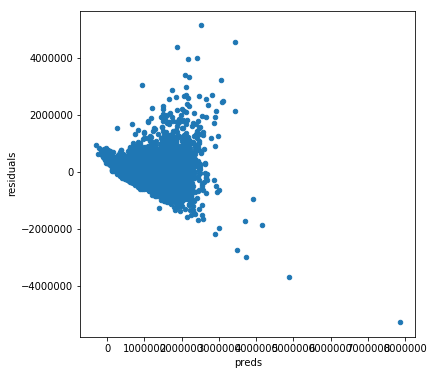

In [288]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")



In [235]:
benchmark(model_lasso,X_test,y_test)

0.4162651564169982

# Elastic Net

In [190]:
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv=make_pipeline(RobustScaler(),ElasticNetCV(alphas=e_alphas,cv=kfolds,l1_ratio=e_l1ratio))
elastic_cv.fit(X_train,y_train)

benchmark(elastic_cv,X_test,y_test)

0.4171870352594897

# SVM

In [191]:
from sklearn import svm

svr_model=svm.SVR(C=10000000,gamma=1e-8,epsilon=0.2)

svr_model.fit(X_train,y_train)

benchmark(svr_model,X_test,y_test)

0.3718994181294274

# Random Forest

In [210]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
rf.fit(X_train,y_train)
benchmark(rf,X_test,y_test)

0.21696111530210171